<a href="https://colab.research.google.com/github/alvina-waqar/data-forecasting/blob/main/weatherforcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [169]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import pandas as pd
import numpy as np

# ignore all warnings
warnings. filterwarnings("ignore")

# read data into dataframe variable df
df = pd.read_csv("/content/weatherAUS.csv")
print('Size of weather data frame is :', df.shape)

# display first few rows of data
df.head()

Size of weather data frame is : (145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [170]:
# give basic statistics of each column 
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [171]:
col_names = df.columns

col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [172]:
df.nunique( )

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [174]:
df.columns=df.columns.str.strip().str.lower()
df.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'windgustdir', 'windgustspeed', 'winddir9am', 'winddir3pm',
       'windspeed9am', 'windspeed3pm', 'humidity9am', 'humidity3pm',
       'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm', 'temp9am',
       'temp3pm', 'raintoday', 'raintomorrow'],
      dtype='object')

In [175]:
df['date'] = pd.to_datetime(df['date']) # parse as datatime

df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day

df[['date', 'Year', 'Month', 'Day']] # preview changes made

df.drop('date', axis=1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   location       145460 non-null  object 
 1   mintemp        143975 non-null  float64
 2   maxtemp        144199 non-null  float64
 3   rainfall       142199 non-null  float64
 4   evaporation    82670 non-null   float64
 5   sunshine       75625 non-null   float64
 6   windgustdir    135134 non-null  object 
 7   windgustspeed  135197 non-null  float64
 8   winddir9am     134894 non-null  object 
 9   winddir3pm     141232 non-null  object 
 10  windspeed9am   143693 non-null  float64
 11  windspeed3pm   142398 non-null  float64
 12  humidity9am    142806 non-null  float64
 13  humidity3pm    140953 non-null  float64
 14  pressure9am    130395 non-null  float64
 15  pressure3pm    130432 non-null  float64
 16  cloud9am       89572 non-null   float64
 17  cloud3pm       86102 non-null

In [176]:
df.isnull().sum( )

location             0
mintemp           1485
maxtemp           1261
rainfall          3261
evaporation      62790
sunshine         69835
windgustdir      10326
windgustspeed    10263
winddir9am       10566
winddir3pm        4228
windspeed9am      1767
windspeed3pm      3062
humidity9am       2654
humidity3pm       4507
pressure9am      15065
pressure3pm      15028
cloud9am         55888
cloud3pm         59358
temp9am           1767
temp3pm           3609
raintoday         3261
raintomorrow      3267
Year                 0
Month                0
Day                  0
dtype: int64

In [177]:
missing = pd.DataFrame(df.isnull().sum(),columns = ['no.of missing values'])

missing['% missing_values']= (missing/len(df)).round(2)*100
missing

,no.of missing values,% missing_values
location,0,0.0
mintemp,1485,1.0
maxtemp,1261,1.0
rainfall,3261,2.0
evaporation,62790,43.0
sunshine,69835,48.0
windgustdir,10326,7.0
windgustspeed,10263,7.0
winddir9am,10566,7.0
winddir3pm,4228,3.0


In [178]:
df=df.drop(['sunshine','evaporation','cloud3pm','cloud9am'], axis=1)

In [179]:
missing

,no.of missing values,% missing_values
location,0,0.0
mintemp,1485,1.0
maxtemp,1261,1.0
rainfall,3261,2.0
evaporation,62790,43.0
sunshine,69835,48.0
windgustdir,10326,7.0
windgustspeed,10263,7.0
winddir9am,10566,7.0
winddir3pm,4228,3.0


In [180]:
# Remove rows where target variables are missing
df.dropna(how='all', subset=['raintomorrow'], inplace=True)

In [181]:
num_col = df.select_dtypes(include=np.number).columns.to_list()
len(num_col)

15

In [182]:
df.head()

,location,mintemp,maxtemp,rainfall,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm,raintoday,raintomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,2008,12,5


In [183]:
cat_col=df.select_dtypes(object).columns.tolist()
len(cat_col)

6

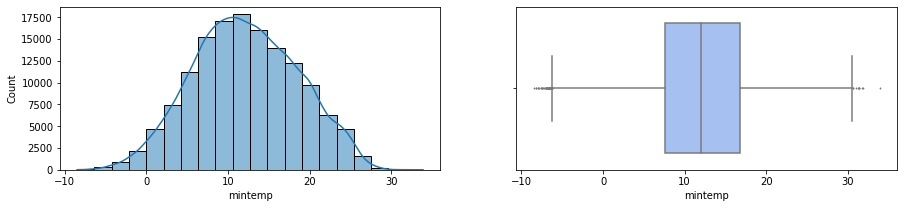

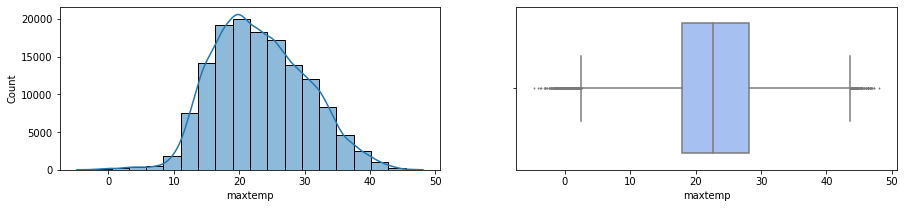

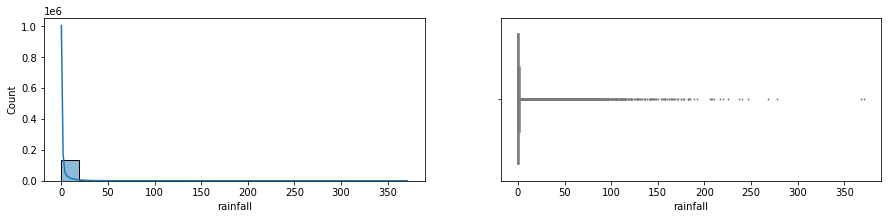

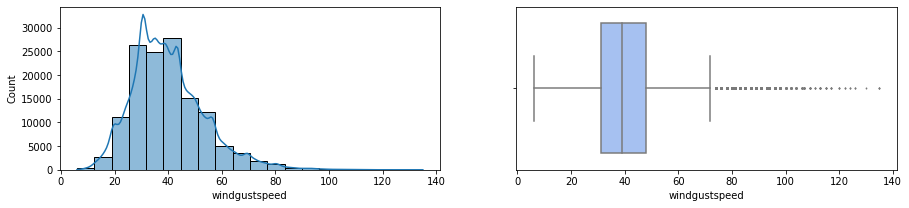

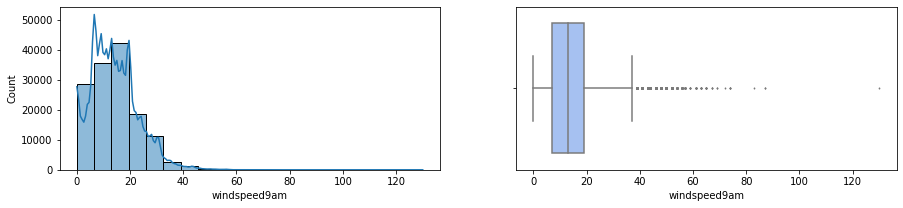

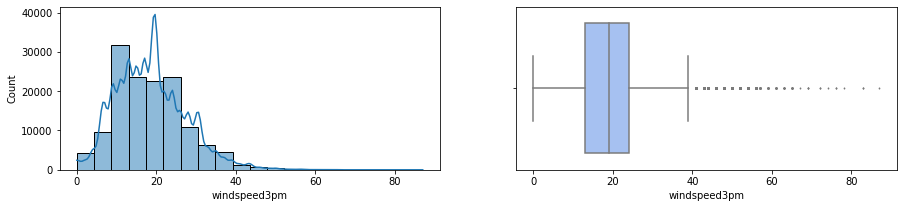

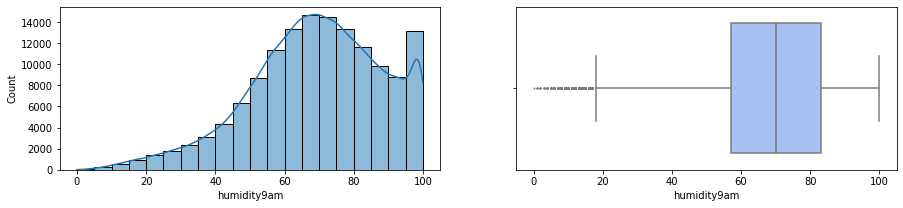

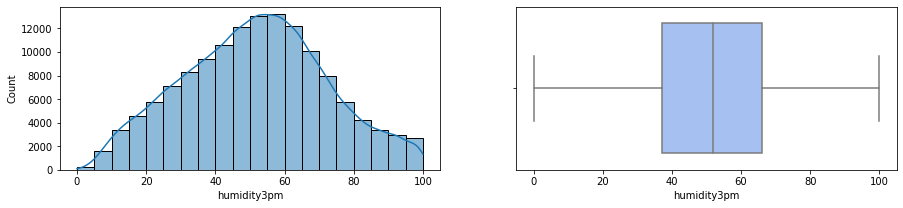

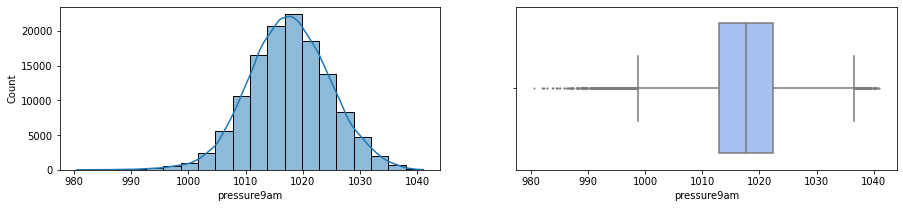

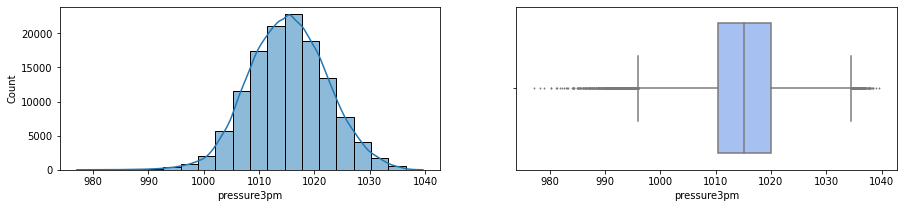

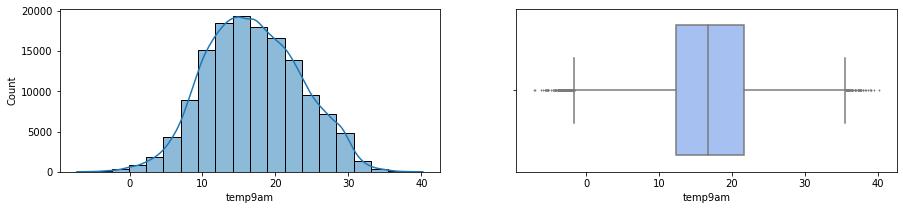

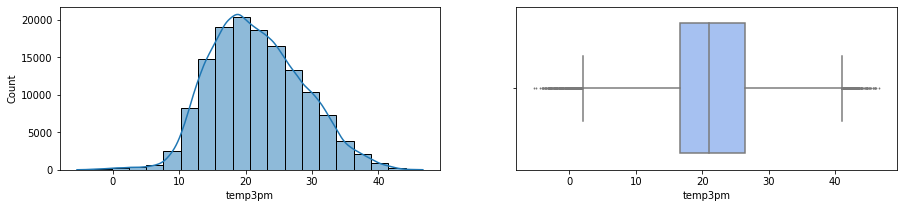

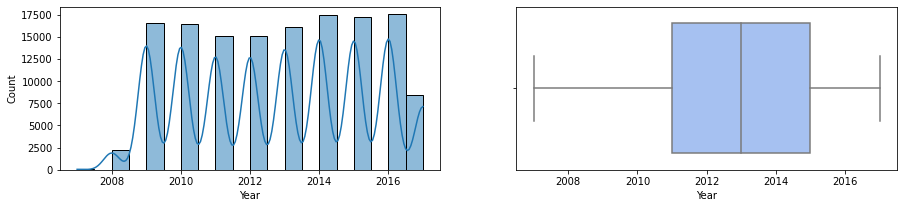

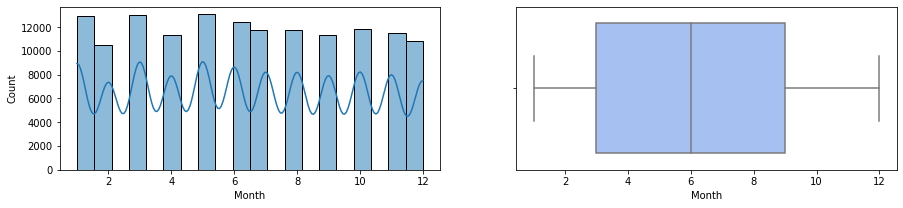

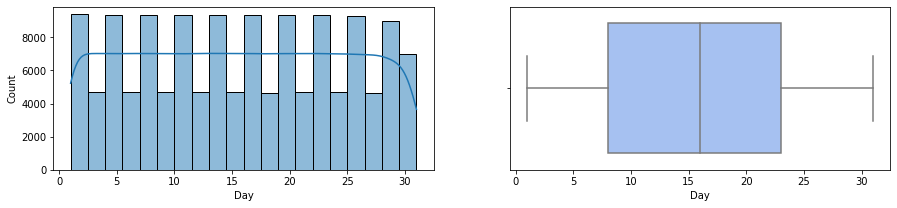

In [184]:
for i in num_col:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(df[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(df[i], ax = axs[1], color='#99befd', fliersize=1);

In [185]:
df=df.drop(['rainfall'], axis=1)
num_col
num_col.remove('rainfall')

In [186]:
from sklearn.preprocessing import LabelEncoder

In [187]:
 #Impute missing values for numerical features
median_values = df[num_col].median()
df[num_col] = df[num_col].fillna(value=median_values)

In [188]:
 #Convert categorized values to numerical values
le = LabelEncoder()
df[cat_col] =df[cat_col].astype('str').apply(le.fit_transform)

In [190]:
# Impute missing values for categorical features
mode_values=df[cat_col].mode()
df[cat_col] = df[cat_col].fillna(value=mode_values)

In [191]:
df.isnull().sum()

location         0
mintemp          0
maxtemp          0
windgustdir      0
windgustspeed    0
winddir9am       0
winddir3pm       0
windspeed9am     0
windspeed3pm     0
humidity9am      0
humidity3pm      0
pressure9am      0
pressure3pm      0
temp9am          0
temp3pm          0
raintoday        0
raintomorrow     0
Year             0
Month            0
Day              0
dtype: int64

In [192]:
df.head()

,location,mintemp,maxtemp,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm,raintoday,raintomorrow,Year,Month,Day
0,2,13.4,22.9,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,2008,12,1
1,2,7.4,25.1,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,2008,12,2
2,2,12.9,25.7,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,2008,12,3
3,2,9.2,28.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,2008,12,4
4,2,17.5,32.3,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,2008,12,5


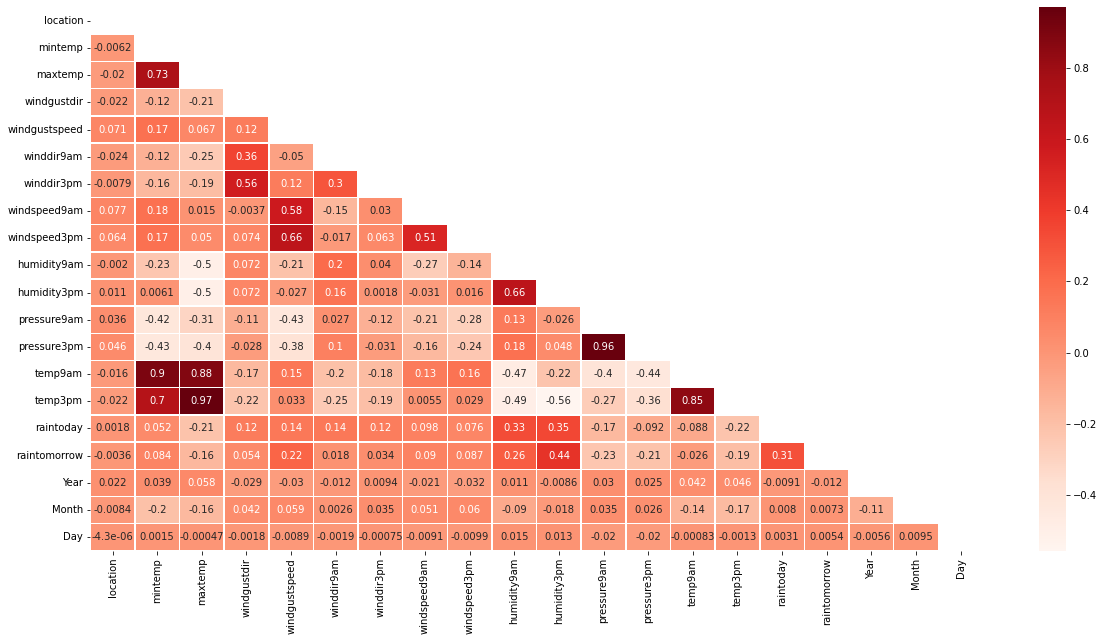

In [193]:
# lets see the correlation between eachother by using heatmap
fig, ax = plt.subplots(figsize=(20,10))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
sns.heatmap(df.corr(), annot=True, cmap="Reds", mask=mask, linewidth=0.5)

In [194]:
# lets drop the correlated variables
df=df.drop(columns=['temp9am','temp3pm','pressure9am'],axis=1)

In [195]:
numcol_del =['temp9am','temp3pm','pressure9am']
num_cols = list(set(num_col) - set(numcol_del))
num_cols

['maxtemp',
 'Year',
 'Day',
 'windgustspeed',
 'mintemp',
 'pressure3pm',
 'windspeed9am',
 'humidity9am',
 'windspeed3pm',
 'Month',
 'humidity3pm']

In [196]:
df.shape

(142193, 17)

In [197]:
cat_col

['location',
 'windgustdir',
 'winddir9am',
 'winddir3pm',
 'raintoday',
 'raintomorrow']

In [198]:
df.describe()

,location,mintemp,maxtemp,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure3pm,raintoday,raintomorrow,Year,Month,Day
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,23.740655,12.185565,23.225365,8.255885,39.920123,7.915755,7.974471,13.992489,18.644279,68.858235,51.495742,1015.252481,0.240989,0.224181,2012.758926,6.402544,15.715084
std,14.237503,6.388936,7.109617,4.953096,13.140632,4.911307,4.731493,8.851614,8.721688,18.932512,20.532227,6.681810,0.450212,0.417043,2.541256,3.426506,8.798150
min,0.000000,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,977.100000,0.000000,0.000000,2007.000000,1.000000,1.000000
25%,11.000000,7.600000,17.900000,4.000000,31.000000,3.000000,4.000000,7.000000,13.000000,57.000000,37.000000,1011.000000,0.000000,0.000000,2011.000000,3.000000,8.000000
50%,24.000000,12.000000,22.600000,9.000000,39.000000,8.000000,8.000000,13.000000,19.000000,70.000000,52.000000,1015.200000,0.000000,0.000000,2013.000000,6.000000,16.000000
75%,36.000000,16.800000,28.200000,13.000000,46.000000,12.000000,12.000000,19.000000,24.000000,83.000000,65.000000,1019.400000,0.000000,0.000000,2015.000000,9.000000,23.000000
max,48.000000,33.900000,48.100000,16.000000,135.000000,16.000000,16.000000,130.000000,87.000000,100.000000,100.000000,1039.600000,2.000000,1.000000,2017.000000,12.000000,31.000000


In [199]:
# spliting training and testing data
from sklearn.model_selection import train_test_split

X = df.drop(['raintomorrow'], axis = 1)
y = df['raintomorrow']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=27)

In [200]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [201]:
# Initiatlize the model
logreg = LogisticRegression(solver='liblinear', random_state = 0)

# Fit the model
logreg.fit(X_train, y_train)

# Predict data points 
y_pred_test = logreg.predict(X_test)

# Print accuracy scores
print(f'Model accuracy score: {round(accuracy_score(y_test, y_pred_test) * 100, 2)}%')

Model accuracy score: 83.74%


In [202]:
# Additional Metrics

print(f'Training set score: {round(logreg.score(X_train, y_train) * 100, 2)}%')
print(f'Test set score: {round(logreg.score(X_test, y_test) * 100, 2)}%')

Training set score: 83.97%
Test set score: 83.74%


In [204]:
from sklearn.ensemble import RandomForestClassifier

In [205]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

In [206]:
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [207]:
model.score(X_train, y_train)

0.9999899532827649

In [208]:
model.score(X_test, y_test)

0.8525247315861034

In [209]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
df_scaled = pd.DataFrame(scalar.fit_transform(df), columns=df.columns)
df_scaled.head()

,location,mintemp,maxtemp,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure3pm,raintoday,raintomorrow,Year,Month,Day
0,-1.527004,0.190085,-0.045764,0.957812,0.310479,1.035216,1.273499,0.678693,0.614071,0.113127,-1.436563,-1.220105,-0.535282,-0.537551,-1.872674,1.633581,-1.672526
1,-1.527004,-0.749042,0.263677,1.159706,0.310479,-0.390072,1.484849,-1.128893,0.384757,-1.312997,-1.290451,-1.115343,-0.535282,-0.537551,-1.872674,1.633581,-1.558865
2,-1.527004,0.111824,0.348070,1.361601,0.462679,1.035216,1.484849,0.565719,0.843386,-1.629913,-1.046931,-0.980648,-0.535282,-0.537551,-1.872674,1.633581,-1.445205
3,-1.527004,-0.467304,0.671577,-0.859240,-1.211523,0.220766,-1.685409,-0.338074,-1.105785,-1.260177,-1.728788,-0.367040,-0.535282,-0.537551,-1.872674,1.633581,-1.331544
4,-1.527004,0.831821,1.276393,0.957812,0.082179,-1.408134,-0.205955,-0.789970,0.155443,0.694140,-0.900818,-1.384732,-0.535282,-0.537551,-1.872674,1.633581,-1.217883


In [210]:
from sklearn.decomposition import PCA

In [211]:
pca = PCA(n_components=.95)

In [212]:
df_pca = pd.DataFrame(pca.fit_transform(df_scaled))
x = df_pca
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.650429,0.925578,-2.384816,-0.625894,2.348670,2.002203,0.235152,-0.312269,-0.449547,-0.324792,-0.400059,-0.423865,0.623765,0.394276
1,0.759653,-0.146916,-2.692122,-0.610122,2.767449,1.882355,0.168135,0.447892,0.812557,-0.119654,-0.384525,-0.938894,-0.573328,0.262255
2,1.299102,0.965619,-3.060223,-0.802056,2.418604,1.787811,0.210790,-0.199251,-0.407735,-0.250510,-0.141106,0.212812,0.316664,0.184184
3,1.030892,-2.577566,-0.522684,0.735117,2.889860,1.762102,0.265540,0.104942,-0.798854,0.186026,1.035126,-0.062356,0.426760,-0.568065
4,1.380878,-0.374150,-0.228369,-0.563914,2.913023,1.573654,0.355246,0.252367,0.421318,-0.211575,-1.784793,-0.849835,-0.692233,-0.504563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,0.436919,-2.485218,0.425077,2.207145,-1.692968,-0.806680,-0.536123,0.925225,0.196072,0.348718,0.885756,-0.418488,0.073939,-0.329547
142189,0.286831,-2.539179,-0.090071,1.468088,-1.612213,-0.918599,-0.341551,0.900032,-0.555275,0.063582,1.749004,-0.389711,0.359483,-0.153655
142190,-0.025889,-2.562456,-0.516997,0.518610,-1.500527,-1.060063,-0.176671,1.100537,-0.230616,0.197781,1.245591,-0.126513,0.330960,-0.662266
142191,0.250665,-1.745234,-1.170029,-0.297975,-1.486836,-1.221906,-0.173904,1.402112,0.368525,0.259561,1.018970,-0.460673,0.458466,1.287611


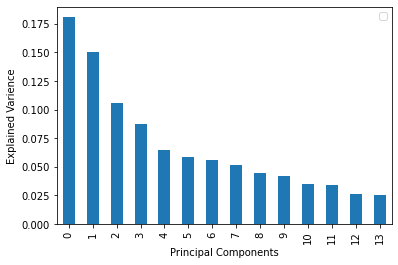

In [213]:
import matplotlib.pyplot as plt
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Principal Components')
plt.ylabel('Explained Varience');

In [214]:
#splitting dataset into a training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

In [215]:
#fitting logistic Regression to training set

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)

classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [216]:
y_pred = classifier.predict(X_test)

print("accuracy score:", accuracy_score(Y_test,y_pred))

accuracy score: 1.0
